In [29]:
import json

In [41]:
main_path = 'outputs/gpt-3.5-turbo-16k-0613_$proofwriter-neurosymbolic-2shot_debug_ates_new_prompt_2__'

linc_main_path = 'outputs/gpt-3.5-turbo-16k-0613_$proofwriter-neurosymbolic-2shot_'

contexts =  json.loads(open(f'{main_path}context.json', 'r').read())

generation_prc =  json.loads(open(f'{main_path}generations_prc.json', 'r').read())

generation_raw =  json.loads(open(f'{main_path}generations_raw.json', 'r').read())

references =  json.loads(open(f'{main_path}references.json', 'r').read())

old_generation_raw = json.loads(open(f'{linc_main_path}generations_raw.json', 'r').read())

old_generation_prc = json.loads(open(f'{linc_main_path}generations_prc.json', 'r').read())

In [42]:
references

['Uncertain',
 'False',
 'Uncertain',
 'True',
 'False',
 'False',
 'True',
 'Uncertain',
 'True',
 'Uncertain',
 'False',
 'True',
 'True',
 'True',
 'Uncertain',
 'Uncertain',
 'True',
 'Uncertain',
 'True',
 'Uncertain']

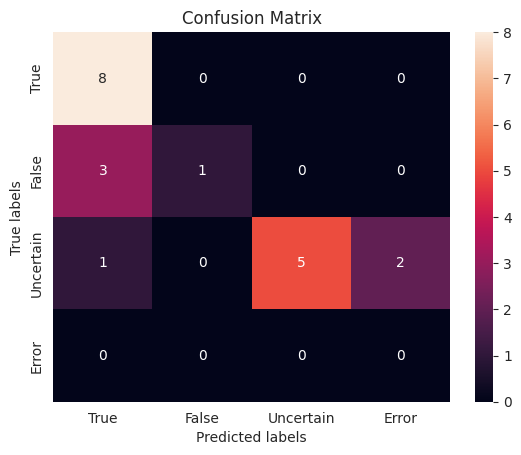

In [43]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

labels=["True", "False", "Uncertain", "Error"]

cm = confusion_matrix(
    labels=labels,
    y_true=references,
    y_pred=[x[0] for x in generation_prc]
)

ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
# plt.savefig('results/coc-cm.png')

In [37]:
import pandas as pd

df = pd.DataFrame({
    "contexts": [x[0] for x in contexts],
    "generation_prc": [x[0] for x in generation_prc],
    "generation_raw": [x[0] for x in generation_raw],
    "old_generation_raw": [x[0] for x in old_generation_raw],
    "old_generation_prc": [x[0] for x in old_generation_prc],
    "references": references,
    'idx': range(len(contexts))
})

# bads_df = df[(df['generation_prc'] == 'True') & (df['references'] != 'True') & (df['references'] == df['old_generation_prc'])]

bads_df = df[(df['generation_prc'] == 'Error')]

In [40]:
# print(bad_mask.iloc[0].contexts)
# print(bads_df.iloc[1].idx)
print(bads_df.iloc[2].contexts)
# bads_df.iloc[1]

Premise: The bald eagle needs the squirrel to survive.
FOL: Needs(BaldEagle, Squirrel)

Premise: The cow does not like the squirrel.
FOL: -Likes(Cow, Squirrel)

Premise: If someone chases the squirrel and they are big, then they do not like the squirrel.
FOL: all x. (Chase(x, Squirrel) & Big(x) -> -Likes(x, Squirrel))

Premise: If someone chases the squirrel and they are round, then they like the squirrel.
FOL: all x. (Chase(x, Squirrel) & Round(x) -> Likes(x, Squirrel))

Premise: If someone likes the squirrel, then they do not need the squirrel.
FOL: all x. (Likes(x, Squirrel) -> -Needs(x, Squirrel))

<CONTEXT>
Premise: The bald eagle needs the squirrel.
FOL: Needs(BaldEagle, Squirrel)

Premise: The cow does not like the squirrel.
FOL: -Likes(Cow, Squirrel)

Premise: If someone chases the squirrel and they are big, then they do not like the squirrel.
FOL: all x. (Chase(x, Squirrel) & Big(x) -> -Likes(x, Squirrel))

Premise: If someone chases the squirrel and they are round, then they 

extra context we have generated:

Premise: The bear is an animal.
FOL: Animal(Bear)
Premise: The dog is an animal.
FOL: Animal(Dog)
Premise: The rabbit is an animal.
FOL: Animal(Rabbit)
Premise: The tiger is an animal.
FOL: Animal(Tiger)
Premise: If something needs an animal, then that animal is needed.
FOL: all x. all y. (Needs(x, y) -> Needs(y, x))
Premise: If something eats an animal, then that animal is eaten.
FOL: all x. all y. (Eats(x, y) -> Eats(y, x))
Premise: If something sees an animal, then that animal is seen.
FOL: all x. all y. (Sees(x, y) -> Sees(y, x))
Premise: If something is round, then it is a shape.
FOL: all x. (Round(x) -> Shape(x))
Premise: If something is cold, then it is not warm.
FOL: all x. (Cold(x) -> -Warm(x))
Premise: If something is young, then it is not old.
FOL: all x. (Young(x) -> -Old(x))
Premise: If something is eaten by a bear and needs a rabbit, then it is eaten by the tiger.
FOL: all x. (Eats(Bear, x) & Needs(x, Rabbit) -> Eats(Tiger, x))
Premise: If something sees a rabbit, then it is eaten by the bear.
FOL: all x. (Sees(x, Rabbit) -> Eats(x, Bear))
Premise: If something eats the bear and sees the rabbit, then it eats the dog.
FOL: all x. (Eats(x, Bear) & Sees(x, Rabbit) -> Eats(x, Dog))
Premise: If something eats the dog, then it eats the bear.
FOL: all x. (Eats(x, Dog) -> Eats(x, Bear))
Premise: If something eats the dog, then it needs the tiger.
FOL: all x. (Eats(x, Dog) -> Needs(x, Tiger))
Premise: If something eats the tiger, then it is cold.
FOL: all x. (Eats(x, Tiger) -> Cold(x))
Premise: If something eats the rabbit, then it is round.
FOL: all x. (Eats(x, Rabbit) -> Round(x))
Premise: If something sees the rabbit, then it is seen by the tiger.
FOL: all x. (Sees(x, Rabbit) -> Sees(Tiger, x))
Premise: If something sees the dog, then it is seen by the rabbit.
FOL: all x. (Sees(x, Dog) -> Sees(Rabbit, x))
Premise: If something sees the dog, then it eats the rabbit.
FOL: all x. (Sees(x, Dog) -> Eats(x, Rabbit))
Premise: If something sees the dog, then it sees the bear.
FOL: all x. (Sees(x, Dog) -> Sees(x, Bear))
Premise: If something sees the rabbit, then it sees the bear.
FOL: all x. (Sees(x, Rabbit) -> Sees(x, Bear))
Premise: If something sees the rabbit, then it eats the bear.
FOL: all x. (Sees(x, Rabbit) -> Eats(x, Bear))

In [14]:
from eval.tasks import get_task

task_name = "proofwriter-neurosymbolic-2shot"
task = get_task(task_name)


/home/shayan/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
dataset = task.get_dataset()

In [16]:
dataset[5]

{'id': 'RelNeg-OWA-D5-206',
 'QDep': 1,
 'premises': ['The bald eagle does not need the mouse.',
  'The bear does not eat the bald eagle.',
  'The bear eats the tiger.',
  'The mouse chases the bald eagle.',
  'The mouse eats the bear.',
  'The mouse is round.',
  'The tiger eats the bear.',
  'If something is round then it chases the bear.',
  'If something eats the bear and it does not need the bald eagle then it chases the bear.',
  'If something chases the bear then it needs the tiger.',
  'If something chases the mouse and the mouse is red then it does not eat the bald eagle.',
  'If something is red then it does not eat the bald eagle.',
  'If something is round and it needs the tiger then the tiger is round.',
  'If something needs the bald eagle then it is not red.',
  'If something needs the bald eagle and the bald eagle eats the tiger then the tiger eats the mouse.',
  'If something is round and it does not eat the mouse then it does not need the mouse.'],
 'conclusion': 'The

In [17]:
print(bads_df.iloc[1].contexts)


Premise: The mouse is not round.
FOL: -Round(Mouse)
Premise: The tiger is not round.
FOL: -Round(Tiger)
Premise: The bear is not round.
FOL: -Round(Bear)
Premise: The mouse does not need the tiger.
FOL: -Needs(Mouse, Tiger)
Premise: The bear does not need the tiger.
FOL: -Needs(Bear, Tiger)
Premise: The bald eagle does not chase the mouse.
FOL: -Chases(BaldEagle, Mouse)
Premise: If something needs the tiger, then it does not chase the tiger.
FOL: all x. (Needs(x, Tiger) -> -Chases(x, Tiger))
Premise: If something chases the bald eagle, then it does not eat the mouse.
FOL: all x. (Chases(x, BaldEagle) -> -Eats(x, Mouse))
Premise: If something chases the tiger, then it does not eat the mouse.
FOL: all x. (Chases(x, Tiger) -> -Eats(x, Mouse))
Premise: If something chases the bald eagle, then it does not eat the tiger.
FOL: all x. (Chases(x, BaldEagle) -> -Eats(x, Tiger))
Premise: If something eats the mouse, then it does not need the mouse.
FOL: all x. (Eats(x, Mouse) -> -Needs(x, Mouse))

In [18]:
print(task.get_prompt(dataset[5]))

The following is a first-order logic (FOL) problem.
The problem is to determine whether the conclusion follows from the premises.
The premises are given in the form of a set of first-order logic sentences.
The conclusion is given in the form of a single first-order logic sentence.
The task is to translate each of the premises and conclusions into FOL expressions, so that the expressions can be evaluated by a theorem solver to determine whether the conclusion follows from the premises.
Expressions should be adhere to the format of the Python NLTK package logic module.


<PREMISES>
All dispensable things are environment-friendly.
All woodware is dispensable.
All paper is woodware.
No good things are bad.
All environment-friendly things are good.
A worksheet is either paper or is environment-friendly.
</PREMISES>
<CONCLUSION>
A worksheet is not dispensable.
</CONCLUSION>
<EVALUATE>
TEXT:	All dispensable things are environment-friendly.
FOL:	all x. (Dispensable(x) -> EnvironmentFriendly(x)